<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/AbdelMahm/FSR/blob/master/IDDLO-29-20/Notebooks/Linear_Regression.ipynb"><img src="https://colab.research.google.com/img/colab_favicon_256px.png" />Run in Google Colab</a>
  </td>
</table>

# Linear Regression

## imports

In [1]:
import sys
import sklearn
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
import urllib.request
from sklearn import preprocessing
from sklearn import pipeline

## Download data

In [2]:
import urllib.request
data_path = os.path.join("datasets", "")
download_path = "https://raw.githubusercontent.com/AbdelMahm/FSR/master/IDDLO-29-20/Notebooks/datasets/"
os.makedirs(data_path, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = download_path + filename
    urllib.request.urlretrieve(url, data_path + filename)

In [3]:
oecd_bli = pd.read_csv(data_path + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(data_path + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

In [4]:
#take a look to the first file
oecd_bli.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


In [10]:
print(oecd_bli["INDICATOR"])

0       HO_BASE
1       HO_BASE
2       HO_BASE
3       HO_BASE
4       HO_BASE
         ...   
3287    WL_TNOW
3288    WL_TNOW
3289    WL_TNOW
3290    WL_TNOW
3291    WL_TNOW
Name: INDICATOR, Length: 3292, dtype: object


## Preprocessing

In [11]:
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
oecd_bli.head()


Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,Housing expenditure,Job security,Life expectancy,Life satisfaction,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,20.0,4.8,82.1,7.3,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,21.0,3.9,81.0,6.9,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,21.0,5.0,80.5,6.9,3.88,48082.0,94.0,2.2,74.0,509.0,15.71,89.0,87.0,18.9
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,21.0,4.6,73.7,7.0,1.97,17177.0,90.0,1.6,69.0,402.0,14.97,79.0,72.0,16.3
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,21.0,6.4,81.5,7.3,0.90,46911.0,92.0,2.5,89.0,522.0,14.25,61.0,91.0,17.2


In [12]:
#take a look to the first file
gdp_per_capita.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [13]:
# Preprocessing of the data  (iterested with column "2015" which is the "GDP per capita")
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
gdp_per_capita.head()


,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [18]:
#merge data  
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                              left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)
print(full_country_stats.columns)
data = full_country_stats[["GDP per capita", 'Life satisfaction']]


Index(['Air pollution', 'Assault rate', 'Consultation on rule-making',
       'Dwellings without basic facilities', 'Educational attainment',
       'Employees working very long hours', 'Employment rate', 'Homicide rate',
       'Household net adjusted disposable income',
       'Household net financial wealth', 'Housing expenditure', 'Job security',
       'Life expectancy', 'Life satisfaction', 'Long-term unemployment rate',
       'Personal earnings', 'Quality of support network', 'Rooms per person',
       'Self-reported health', 'Student skills',
       'Time devoted to leisure and personal care', 'Voter turnout',
       'Water quality', 'Years in education', 'Subject Descriptor', 'Units',
       'Scale', 'Country/Series-specific Notes', 'GDP per capita',
       'Estimates Start After'],
      dtype='object')


## Linear Regression Model

In [ ]:
data.head()

,GDP per capita,Life satisfaction
Country,,
Brazil,8669.998,7.0
Mexico,9009.280,6.7
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9


In [ ]:
print(data)

                 GDP per capita  Life satisfaction
Country                                           
Brazil                 8669.998                7.0
Mexico                 9009.280                6.7
Russia                 9054.914                6.0
Turkey                 9437.372                5.6
Hungary               12239.894                4.9
Poland                12495.334                5.8
Chile                 13340.905                6.7
Slovak Republic       15991.736                6.1
Czech Republic        17256.918                6.5
Estonia               17288.083                5.6
Greece                18064.288                4.8
Portugal              19121.592                5.1
Slovenia              20732.482                5.7
Spain                 25864.721                6.5
Korea                 27195.197                5.8
Italy                 29866.581                6.0
Japan                 32485.545                5.9
Israel                35343.336

### Select some features

In [21]:
#select the features you are interested in
X = np.c_[data["GDP per capita"]]
y = np.c_[data["Life satisfaction"]]
np.shape(X)

(36, 1)

### Visualization

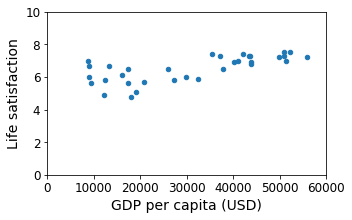

In [ ]:
# Visualize the sample data
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])

plt.xlabel("GDP per capita (USD)")

plt.show()
#

**Linear Regression Model 1 :**

### Training

In [ ]:
lrModel = sklearn.linear_model.LinearRegression()

# Train the model
lrModel.fit(X, y)

#model parameters
w0, w1 = lrModel.intercept_[0], lrModel.coef_[0][0]

#R2 (when R2=1, all data is fit -> the Loss(w)=0)
print(lrModel.score(X, y))

0.40410998750014093


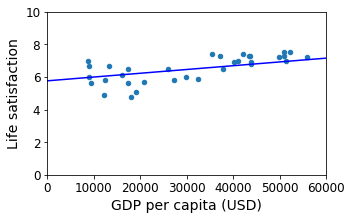

In [ ]:
#plot
data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.xlabel("GDP per capita (USD)")
plt.axis([0, 60000, 0, 10])
x=np.linspace(0, 60000, 1000)
plt.plot(x, w0 + w1*x, "b")

#save_fig('best_fit_model_plot')
plt.show()

### Prediction

In [ ]:
# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(lrModel.predict(X_new)) # outputs [[ 5.96242338]]

[[6.28653637]]


## Add polynomial features

In [ ]:
poly = preprocessing.PolynomialFeatures(degree=5, include_bias=False)
scaler = preprocessing.StandardScaler()

pipelineLRModel = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('lin', lrModel)])
np.shape(X)
np.shape(y)
pipelineLRModel.fit(X, y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=5, include_bias=False,
                                    interaction_only=False, order='C')),
                ('scal',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lin',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

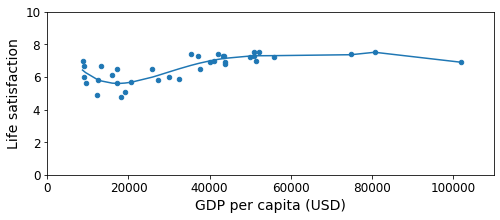

In [ ]:
data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,3))
plt.axis([0, 110000, 0, 10])

curve = pipelineLRModel.predict(X)
plt.plot(X,curve)
plt.xlabel("GDP per capita (USD)")
plt.show()


In [ ]:
#R2
print(pipelineLRModel.score(X, y))

0.6806653014078106


### Regularization (Ridge)

In [ ]:
lrModelRidge = sklearn.linear_model.Ridge(alpha=10**9.5) # alpha == lambda notation in the course
Xsample = np.c_[data["GDP per capita"]]
ysample = np.c_[data["Life satisfaction"]]
lrModelRidge.fit(Xsample, ysample)
w0ridge, w1ridge = lrModelRidge.intercept_[0], lrModelRidge.coef_[0][0]


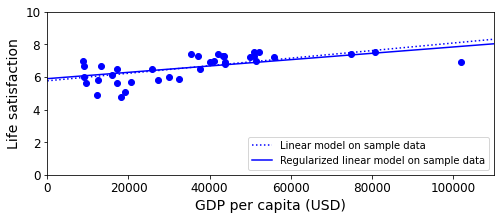

In [ ]:
f = plt.figure(figsize=(8,3))

plt.xlabel("GDP per capita")
plt.ylabel('Life satisfaction')

plt.plot(list(data["GDP per capita"]), list(data["Life satisfaction"]), "bo")

x = np.linspace(0, 110000, 1000)
plt.plot(x, w0 + w1*x, "b:", label="Linear model on sample data")
plt.plot(x, w0ridge + w1ridge * x, "b", label="Regularized linear model on sample data")

plt.legend(loc="lower right")
plt.axis([0, 110000, 0, 10])
plt.xlabel("GDP per capita (USD)")

plt.show()

In [ ]:
#R2
print(lrModelRidge.score(X, y))

0.39354133243998385


## Exercise

### 1- try LASSO regularization
### 2- try on different data
### 3- try with more features
### 4- tune the regularization hyper-parameter alpha (lambda in the course)

##Answers :

LASSO regularisation :

In [75]:
lrModelLASSO = sklearn.linear_model.Lasso(alpha=0.95) # alpha == lambda notation in the course
Xsample = np.c_[data["GDP per capita"]]
ysample = np.c_[data["Life satisfaction"]]
lrModelLASSO.fit(Xsample, ysample)
w0LASSO  = lrModelLASSO.intercept_[0]
w1LASSO=lrModelLASSO.coef_[0]


In [76]:
print(lrModelLASSO.score(X, y))

0.40410998422548833


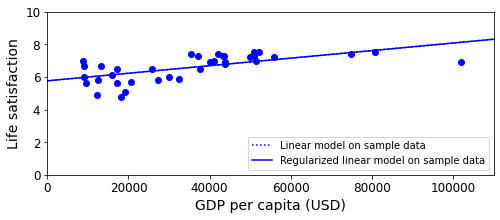

In [ ]:
f = plt.figure(figsize=(8,3))

plt.xlabel("GDP per capita")
plt.ylabel('Life satisfaction')

plt.plot(list(data["GDP per capita"]), list(data["Life satisfaction"]), "bo")

x = np.linspace(0, 110000, 1000)
plt.plot(x, w0 + w1*x, "b:", label="Linear model on sample data")
plt.plot(x, w0LASSO + w1LASSO * x, "b", label="Regularized linear model on sample data")

plt.legend(loc="lower right")
plt.axis([0, 110000, 0, 10])
plt.xlabel("GDP per capita (USD)")

plt.show()

**More feautures** 

In [43]:
data2 = full_country_stats[["Educational attainment", 'Life satisfaction']]

In [44]:
print(data2)

                 Educational attainment  Life satisfaction
Country                                                   
Brazil                             45.0                7.0
Mexico                             37.0                6.7
Russia                             94.0                6.0
Turkey                             34.0                5.6
Hungary                            82.0                4.9
Poland                             90.0                5.8
Chile                              57.0                6.7
Slovak Republic                    92.0                6.1
Czech Republic                     92.0                6.5
Estonia                            90.0                5.6
Greece                             68.0                4.8
Portugal                           38.0                5.1
Slovenia                           85.0                5.7
Spain                              55.0                6.5
Korea                              82.0                5

In [45]:
X2 = np.c_[data2["Educational attainment"]]
y = np.c_[data2["Life satisfaction"]]
np.shape(X2)

(36, 1)

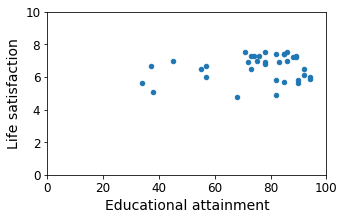

In [46]:
# Visualization 
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

data2.plot(kind='scatter', x="Educational attainment", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 100, 0, 10])

plt.xlabel("Educational attainment")

plt.show()


**Linear Regression Model 2 :**

In [47]:
lrModel2 = sklearn.linear_model.LinearRegression()

# Train the model
lrModel2.fit(X2, y)

#model parameters
w02, w12 = lrModel2.intercept_[0], lrModel2.coef_[0][0]

#R2 (when R2=1, all data is fit -> the Loss(w)=0)
print(lrModel2.score(X2, y))

0.029733954189218648


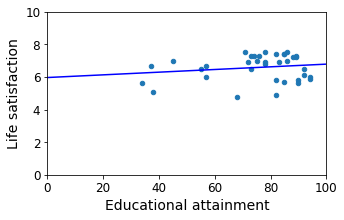

In [48]:
#plot
data1.plot(kind='scatter', x="Educational attainment", y='Life satisfaction', figsize=(5,3))
plt.xlabel("Educational attainment")
plt.axis([0, 100, 0, 10])
x=np.linspace(0, 100, 10)
plt.plot(x, w02 + w12*x, "b")

#save_fig('best_fit_model_plot')
plt.show()

**Ridge Regularization :**

In [85]:
lrModelRidge2 = sklearn.linear_model.Ridge(alpha=10**9.5) # alpha == lambda notation in the course
Xsample = np.c_[data2["Educational attainment"]]
ysample = np.c_[data2["Life satisfaction"]]
lrModelRidge2.fit(Xsample, ysample)
w0ridge2, w1ridge2 = lrModelRidge2.intercept_[0], lrModelRidge2.coef_[0][0]

In [86]:
#R2
print(lrModelRidge2.score(X2, y))

1.8076246344200797e-07


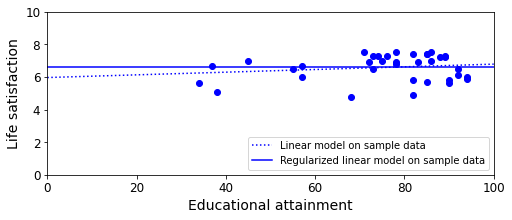

In [87]:
f = plt.figure(figsize=(8,3))

plt.xlabel("Educational attainment")
plt.ylabel('Life satisfaction')

plt.plot(list(data2["Educational attainment"]), list(data2["Life satisfaction"]), "bo")

x = np.linspace(0, 100, 10)
plt.plot(x, w02 + w12*x, "b:", label="Linear model on sample data")
plt.plot(x, w0ridge2 + w1ridge2 * x, "b", label="Regularized linear model on sample data")

plt.legend(loc="lower right")
plt.axis([0, 100, 0, 10])
plt.xlabel("Educational attainment")

plt.show()

**Tune the regularization hyper-parameter alpha (Ridge)** 

In [93]:
from numpy import arange
from pandas import read_csv
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
model2 = RidgeCV(alphas=arange(0, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')
# fit model
model2.fit(X2, y)
# summarize chosen configuration
print('alpha: %f' % model2.alpha_) # 0.990000

alpha: 0.990000


New alpha :

In [120]:
lrModelRidge2 = sklearn.linear_model.Ridge(alpha=0.99) 
Xsample = np.c_[data2["Educational attainment"]]
ysample = np.c_[data2["Life satisfaction"]]
lrModelRidge2.fit(Xsample, ysample)
w0ridge2, w1ridge2 = lrModelRidge2.intercept_[0], lrModelRidge2.coef_[0][0]

In [121]:
print(lrModelRidge2.score(X2, y))

0.029733953873879115


**LASSO Regularization :**

In [137]:
lrModelLASSO2 = sklearn.linear_model.Lasso(alpha=10*6) 
Xsample = np.c_[data2["Educational attainment"]]
ysample = np.c_[data2["Life satisfaction"]]
lrModelLASSO2.fit(Xsample, ysample)
w0LASSO2  = lrModelLASSO2.intercept_[0]
w1LASSO2=lrModelLASSO2.coef_[0]

In [138]:
print(lrModelLASSO2.score(X2, y))

0.0


**Tune the regularization hyper-parameter alpha (Lasso)**

In [139]:
from sklearn.linear_model import LassoCV

lassocv2  =LassoCV(alphas=[0.001,0.1,1,0.5,0.01])
lassocv2 . fit( X2 ,y) 
lassocv2 . alpha_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0

New alpha :

In [140]:
lrModelRidge2 = sklearn.linear_model.Ridge(alpha=1) 
Xsample = np.c_[data2["Educational attainment"]]
ysample = np.c_[data2["Life satisfaction"]]
lrModelRidge2.fit(Xsample, ysample)
w0ridge2, w1ridge2 = lrModelRidge2.intercept_[0], lrModelRidge2.coef_[0][0]
print(lrModelRidge2.score(X2, y))

0.02973395386747713


# **Different data :**

**Fish market :
Database of common fish species for fish market** 


This dataset is a record of 7 different fish species common in fish market sales. With this data set, a predictive model can be made to predict the weight (target) of the fish.

Meanings of the Columns:



* Species: Species name of fish
* Weight: Weight of fish in gram
* Length1: Vertical length in cm
* Length2: Diagonal length in cm
* Length3: Cross length in cm
* Height: Height in cm
* Width: Diagonal width in cm


Our dependent variable is 'Weight'. Independent variables are 'species', different lengths, 'height' and 'width'.



In [ ]:
import sys
import sklearn
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
import urllib.request
from sklearn import preprocessing
from sklearn import pipeline

**Download data :**

In [ ]:
download_path = "https://raw.githubusercontent.com/FZ-hajji/test1/main/Fish.csv"
data_Fish = pd.read_csv(download_path, thousands=',')
data_Fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
data_Fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


**Processing :**

**Investigating Missing Values**

In [ ]:
print(str('Is there any NaN value in the dataset: '), data_Fish.isnull().values.any())

Is there any NaN value in the dataset:  False


**Separating Dependant and Independant Variables**

In [ ]:
# Dependant (Target) Variable:
y = data_Fish['Weight']
# Independant Variables:
X = data_Fish.iloc[:,2:7]

**Dividing Dataset into Train and Test Datasets**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print('How many samples do we have in our test and train datasets?')
print('X_train: ', np.shape(X_train))
print('y_train: ', np.shape(y_train))
print('X_test: ', np.shape(X_test))
print('y_test: ', np.shape(y_test))

How many samples do we have in our test and train datasets?
X_train:  (127, 5)
y_train:  (127,)
X_test:  (32, 5)
y_test:  (32,)


**Simple linear regression**

In [ ]:
# select some  feature
X1 = np.c_[X_train["Width"]]
y1 = np.c_[y_train] # wight
np.shape(X1)

(127, 1)

**Visualization**

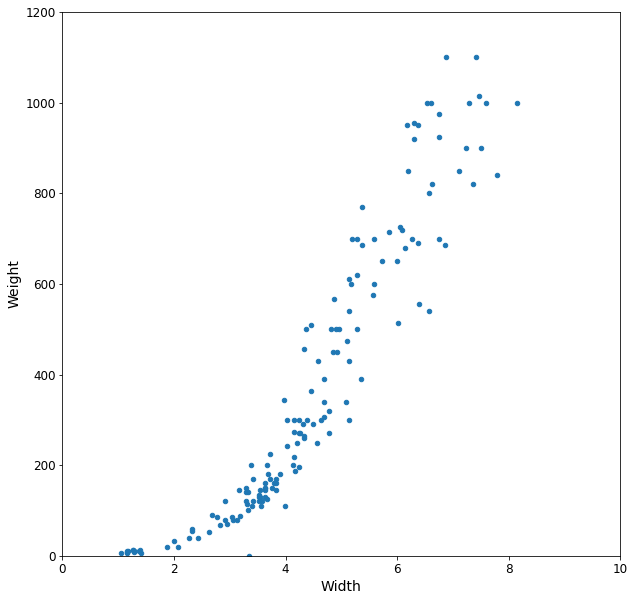

In [ ]:
# Visualize the sample data
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

data_Fish.plot(kind='scatter', x="Width", y='Weight', figsize=(10,10))
plt.axis([0, 10, 0, 1200])

#plt.xlabel("GDP per capita (USD)")

plt.show()

**Regression Model :**

In [ ]:
lrModel = sklearn.linear_model.LinearRegression()

# Train the model
lrModel.fit(X1, y1)

#model parameters
w0, w1 = lrModel.intercept_[0], lrModel.coef_[0][0]

print(lrModel.score(X1, y1))

0.8044191053421011


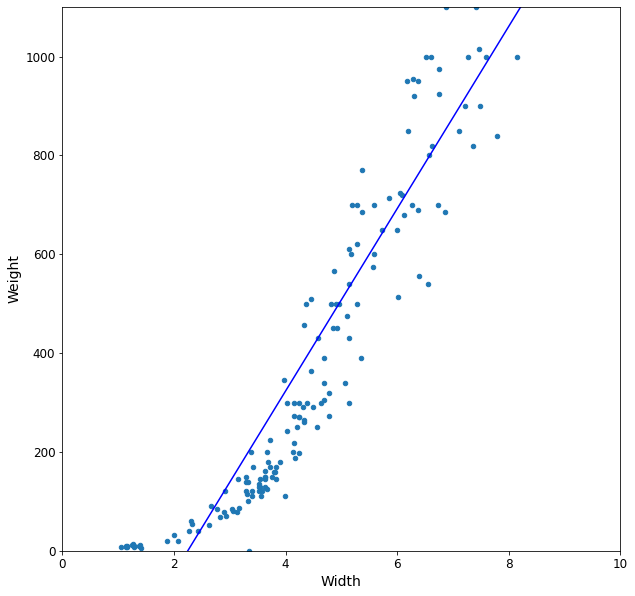

In [ ]:
#plot
data_Fish.plot(kind='scatter', x="Width", y='Weight', figsize=(10,10))
plt.axis([0, 10, 0, 1100])
x=np.linspace(0, 10, 2)
plt.plot(x, w0 + w1*x, "b")

#save_fig('best_fit_model_plot')
plt.show()

**Add polynomial features**

In [ ]:
poly = preprocessing.PolynomialFeatures(degree=5, include_bias=False)
scaler = preprocessing.StandardScaler()

pipelineLRModel = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('lin', lrModel)])
np.shape(X1)
np.shape(y1)
pipelineLRModel.fit(X1, y1)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=5, include_bias=False,
                                    interaction_only=False, order='C')),
                ('scal',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lin',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

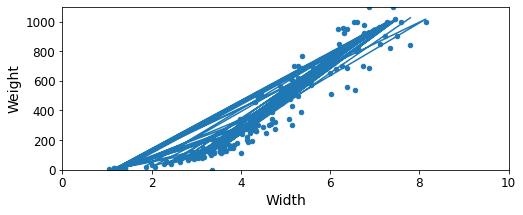

In [ ]:
data_Fish.plot(kind='scatter', x="Width", y='Weight', figsize=(8,3))
plt.axis([0, 10, 0, 1100])
curve = pipelineLRModel.predict(X1)
plt.plot(X1, curve)
plt.show()

In [ ]:
print(pipelineLRModel.score(X1, y1))

0.8617595200290298


**Multiple linear regression**

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)
print('Model intercept: ', reg.intercept_)
print('Model coefficients: ', reg.coef_)



Model intercept:  -484.8536494736823
Model coefficients:  [ 56.90591757  -4.63465655 -28.54481968  24.25584123  43.68347751]


**Prediction**

In [ ]:
y_head = reg.predict(X_train)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
r2_score(y_train, y_head)

0.8861940780217027

**Regularization : Ridge**

Tune hyper-parameter alpha :

In [ ]:
#from sklearn.model_selection import RepeatedKFold
#from numpy import arange
#from pandas import read_csv
from sklearn.linear_model import RidgeCV

ridgecv  =RidgeCV(alphas=[0.001,0.1,1,0.5,0.01])
ridgecv . fit( X1 ,y1 ) 
ridgecv . alpha_



1.0

In [ ]:
lrModelRidge1 = sklearn.linear_model.Ridge(alpha=1) # alpha == lambda notation in the course
Xsample = np.c_[X1]
ysample = np.c_[y1]
lrModelRidge1.fit(X1, y1)
w0ridge1, w1ridge1 = lrModelRidge1.intercept_[0], lrModelRidge1.coef_[0][0]

In [ ]:
print(lrModelRidge1.score(X1, y1))

0.8044134001631282


**Regularization : LASSO**

In [ ]:
from sklearn.linear_model import LassoCV

lassocv  =LassoCV(alphas=[0.001,0.1,1,0.5,0.01,100])
lassocv . fit( X1 ,y1 ) 
lassocv . alpha_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0

In [ ]:
lrModelLASSO1 = sklearn.linear_model.Lasso(alpha=1) # alpha == lambda notation in the course
Xsample = np.c_[X1]
ysample = np.c_[y1]
lrModelLASSO1.fit(Xsample, ysample)
w0LASSO1= lrModelLASSO1.intercept_[0]
w1LASSO1=lrModelLASSO1.coef_[0]

In [ ]:
print(lrModelLASSO1.score(X1, y1))

0.804416387227213
